In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


%matplotlib inline

DATA AVAILABLE -


In [69]:
customer=pd.read_csv("Customer Acqusition.csv")
spend=pd.read_csv("spend.csv")
repayment=pd.read_csv("Repayment.csv")

1. In the above dataset
   

a. In case age is less than 18, replace it with mean of age values

In [9]:
mean_age=customer["Age"].mean()
customer["Age"]=np.where(customer["Age"]<18,mean_age,customer["Age"])

b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
(customer’s limit provided in acquisition table is the per transaction limit on his card)

In [11]:
cust_spend=pd.merge(customer,spend,on="Customer",how="inner")

cust_spend.loc[cust_spend["Amount"]>=cust_spend["Limit"],"Amount"]=(cust_spend["Limit"]*0.5)
cust_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,5000.50
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00


 c. Incase the repayment amount is more than the limit, replace the repayment with the
limit.

In [13]:
cust_repayment=pd.merge(customer,repayment,on="Customer",how="inner")
cust_repayment.loc[cust_repayment["Amount"]>=cust_repayment["Limit"],"Amount"]=cust_repayment["Limit"]*0.5
cust_repayment

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,Unnamed: 4
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,12-Jan-04,495414.75,NaN
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,3-Jan-04,245899.02,NaN
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,15-Jan-04,259490.06,NaN
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,25-Jan-04,437555.12,NaN
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,17-Jan-05,165972.88,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98.0,25-Jan-04,50000.00,NaN
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99.0,12-Jan-04,5000.00,NaN
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100.0,3-Jan-04,5000.50,NaN
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101.0,15-Jan-04,5001.00,NaN


2. From the above dataset create the following summaries:

    a. How many distinct customers exist?

In [15]:
customer["Customer"].nunique()

100

 b. How many distinct categories exist?

In [17]:
customer["Segment"].value_counts()

Segment
Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: count, dtype: int64

c. What is the average monthly spend by customers?

In [31]:
spend["Month"]=pd.to_datetime(spend["Month"],format="%d-%b-%y")
spend["Monthly"]=spend["Month"].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
spend["Yearly"]=spend["Month"].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

spend.groupby(["Yearly","Monthly"])["Amount"].mean().reset_index()

,Yearly,Monthly,Amount
0,2004,April,235272.037143
1,2004,February,221215.270000
2,2004,January,251712.068664
3,2004,March,232146.119286
4,2004,May,217539.236429
5,2004,November,270486.397857
6,2004,September,310923.383571
7,2005,April,252181.326429
8,2005,August,233734.634286
9,2005,December,147503.060000


 d. What is the average monthly repayment by customers?

In [73]:
repayment["Month"]=pd.to_datetime(repayment["Month"],format="%d-%b-%y",errors="coerce")
repayment["Monthly"]=repayment["Month"].apply(lambda x:pd.Timestamp.strftime(x,format="%B") if pd.notna(x) else None)
repayment["Yearly"]=repayment["Month"].apply(lambda x:pd.Timestamp.strftime(x,format="%Y") if pd.notna(x) else None)

repayment.groupby(["Yearly","Monthly"])["Amount"].mean().reset_index()

,Yearly,Monthly,Amount
0,2004,April,259141.679000
1,2004,February,256702.630741
2,2004,January,243489.649786
3,2004,March,252585.280667
4,2004,May,226162.720800
5,2004,November,209592.238000
6,2004,September,184487.848750
7,2005,April,212688.631333
8,2005,August,264430.921622
9,2005,December,320379.335833


e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment
– Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [77]:
customer_final = pd.merge(left=cust_spend , right=repayment , on=['Customer'] , how='inner',suffixes=('_spend','_repay'))

In [79]:
monthly_group=customer_final.groupby(["Yearly","Monthly"])[["Amount_spend","Amount_repay"]].sum()
monthly_group["Monthly_Profit"]=monthly_group["Amount_repay"]-monthly_group["Amount_spend"]
monthly_group["Interest"] = monthly_group["Monthly_Profit"].apply(lambda profit: profit * 0.029 if profit > 0 else 0)
pd.set_option('display.float_format', '{:.2f}'.format)
print(monthly_group)

                  Amount_spend  Amount_repay  Monthly_Profit    Interest
Yearly Monthly                                                          
2004   April      119451601.03  228540279.79    109088678.76  3163571.68
       February    76139224.98  160241901.43     84102676.45  2438977.62
       January   1088357097.31 1699209557.13    610852459.82 17714721.33
       March       55941714.07   89744695.54     33802981.47   980286.46
       May         88004555.83  141159407.17     53154851.34  1541490.69
       November    55046116.65   78602896.81     23556780.16   683146.62
       September   51442777.45   80161221.45     28718444.00   832834.88
2005   April       93664047.03  174789435.58     81125388.55  2352636.27
       August     136140035.56  247744926.77    111604891.21  3236541.85
       December    43486381.25   99445330.31     55958949.06  1622809.52
       February   589055682.16  941616300.01    352560617.85 10224257.92
       January    132412926.47  181033346.45     48

f. What are the top 5 product types?


In [81]:
customer_final["Type"].value_counts().head()

Type
PETRO           4829
CAMERA          4237
FOOD            4056
AIR TICKET      3537
TRAIN TICKET    3387
Name: count, dtype: int64

 g. Which city is having maximum spend?

In [83]:
grouped_spend=customer_final.groupby("City")["Amount_spend"].sum()
grouped_spend.sort_values(ascending=False)

City
COCHIN       1175903212.66
CALCUTTA     1114270118.64
BANGALORE    1081314951.56
BOMBAY        759776502.50
CHENNAI       574871441.07
TRIVANDRUM    435397431.49
PATNA         343469538.48
DELHI         262984441.23
Name: Amount_spend, dtype: float64

 h. Which age group is spending more money?


In [85]:
bins = [17, 30, 45, 60, 100]
labels = [ "18-30", "31-45", "46-60", "60+"]
customer_final["Age_group"]=pd.cut(customer_final["Age"],bins=bins,labels=labels)
age_group_spend=customer_final.groupby("Age_group",observed=True)["Amount_spend"].sum()
age_group_spend.sort_values(ascending=False)

Age_group
46-60   1776658374.78
18-30   1585073655.86
31-45   1400845074.87
60+      985410532.12
Name: Amount_spend, dtype: float64

i. Who are the top 10 customers in terms of repayment?

In [87]:
group_cust=customer_final.groupby("Customer")["Amount_repay"].sum()
group_cust.sort_values(ascending=False).head(10)

Customer
A61   400487430.58
A60   375299048.12
A22   309294535.44
A21   298859092.95
A13   296732020.46
A43   263186015.26
A45   261898380.97
A12   258377564.96
A48   257064919.25
A14   246241327.53
Name: Amount_repay, dtype: float64

3. Calculate the city wise spend on each product on yearly basis. Also include a graphical
representation for the same.


In [89]:
customer_spend_pivot = customer_final.pivot_table(index=["City","Yearly"],columns="Product",values="Amount_spend",aggfunc='sum')
customer_spend_pivot

Product                   Gold     Platimum      Silver
City       Yearly                                      
BANGALORE  2004   230098159.44  18028136.96 24478691.87
           2005   352930068.14  28620347.53 27313954.19
           2006   351431340.60  22532072.80 25882180.03
BOMBAY     2004   201851841.40  18832211.05 17700238.27
           2005   218993535.32  23067493.34 19359352.34
           2006   219236254.45  24169653.33 16565923.00
CALCUTTA   2004   171461926.52 102666018.27  9252383.90
           2005   292627549.70 105931428.45  8882711.31
           2006   326549942.96  89307792.76  7590364.77
CHENNAI    2004    49194263.84  91568689.54  4577333.11
           2005    70038969.41 106188874.98  4522603.45
           2006    69482351.90 172012188.82  7286166.02
COCHIN     2004   219729711.21  88465382.92 15483507.79
           2005   293606804.68 126269298.36 16910385.17
           2006   279428186.15 115709363.99 20300572.39
DELHI      2004    56001558.34   5726756.82 13412300.88
           2005    92840088.75   6681216.29 20649200.36
           2006    45429171.72   4772297.35 17471850.72
PATNA      2004    55736094.03  10504876.64 18854266.32
           2005    61887508.29  21009753.28 22983538.95
           2006    69248472.15  63029259.84 20215768.98
TRIVANDRUM 2004    38347137.36  63094174.26  9317426.58
           2005    57520706.04 102926823.86  1851552.22
           2006    76694274.72  79055237.20  6590099.25

Text(0.5, 1.0, 'City wise spend on each product on yearly basis')

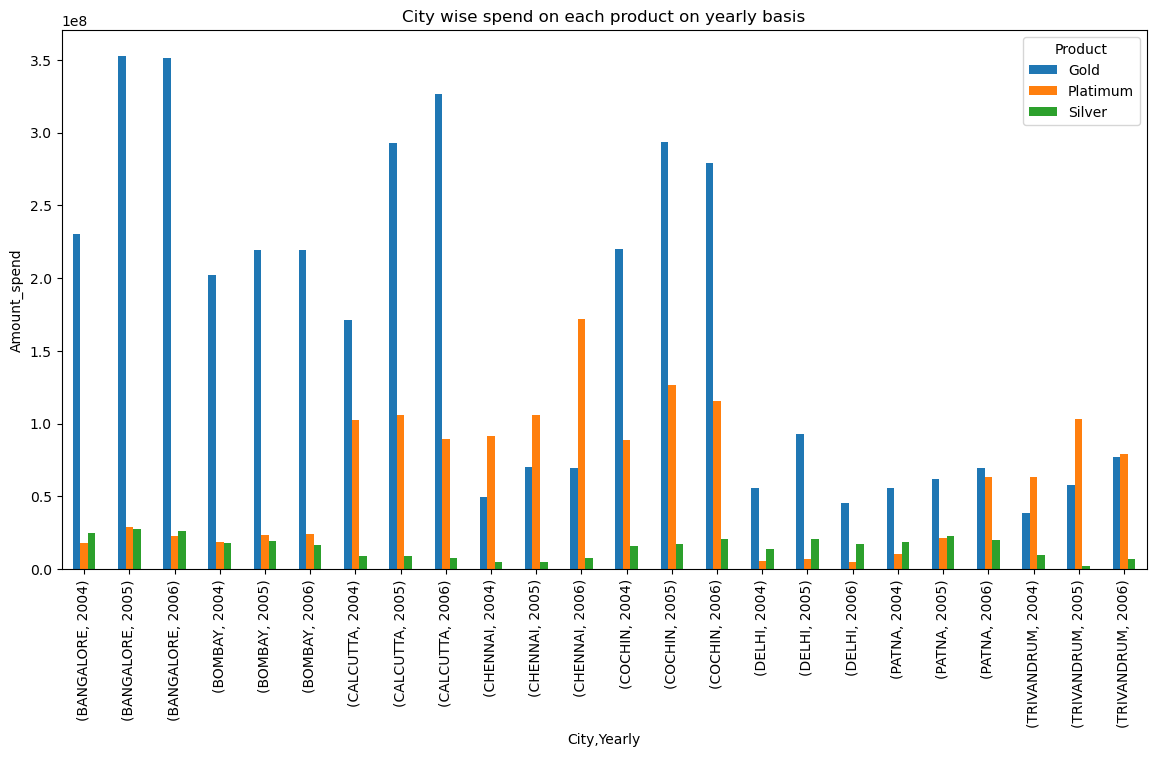

In [91]:
customer_spend_pivot.plot(kind="bar",figsize=(14,7))
plt.ylabel("Amount_spend")
plt.title("City wise spend on each product on yearly basis")

4. Create graphs for

 a. Monthly comparison of total spends, city wise

In [126]:
cust_spend["Month"]=pd.to_datetime(cust_spend["Month"],format="%d-%b-%y",errors="coerce")
cust_spend["Monthly"]=cust_spend["Month"].apply(lambda x:pd.Timestamp.strftime(x,format="%B") if pd.notna(x) else None)
cust_spend["Yearly"]=cust_spend["Month"].apply(lambda x:pd.Timestamp.strftime(x,format="%Y") if pd.notna(x) else None)

city_wise_spend = pd.pivot_table(index="City",columns="Monthly",values="Amount",data=cust_spend,aggfunc="sum")
city_wise_spend

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4207980.48,695061.95,422167.24,6734494.76,9041796.84,2228217.69,1330685.90,5362903.07,6383115.13,2260603.07,1091602.61,703018.28
BOMBAY,1873785.01,1066744.75,140040.71,4276988.30,5948993.33,177726.32,1172594.97,5227850.50,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,3882744.94,2317306.61,909533.05,5747886.38,11714373.54,1290897.30,2495745.07,5645146.53,6581085.69,3127999.60,868551.89,1382242.90
DELHI,777240.75,155402.16,842342.02,1494064.06,2714261.45,50001.50,511276.09,2267149.02,1600322.07,391610.96,64615.46,50001.00
PATNA,2338179.53,419383.64,50000.00,2353333.55,4916205.55,50000.00,746186.13,1437166.61,2136586.80,413677.87,329537.34,70329.95
TRIVANDRUM,1199293.45,453773.94,640922.26,2857123.89,3704336.99,260484.50,400336.83,2392316.51,2813534.48,143387.40,285581.92,186063.70


Text(0, 0.5, 'Amount')

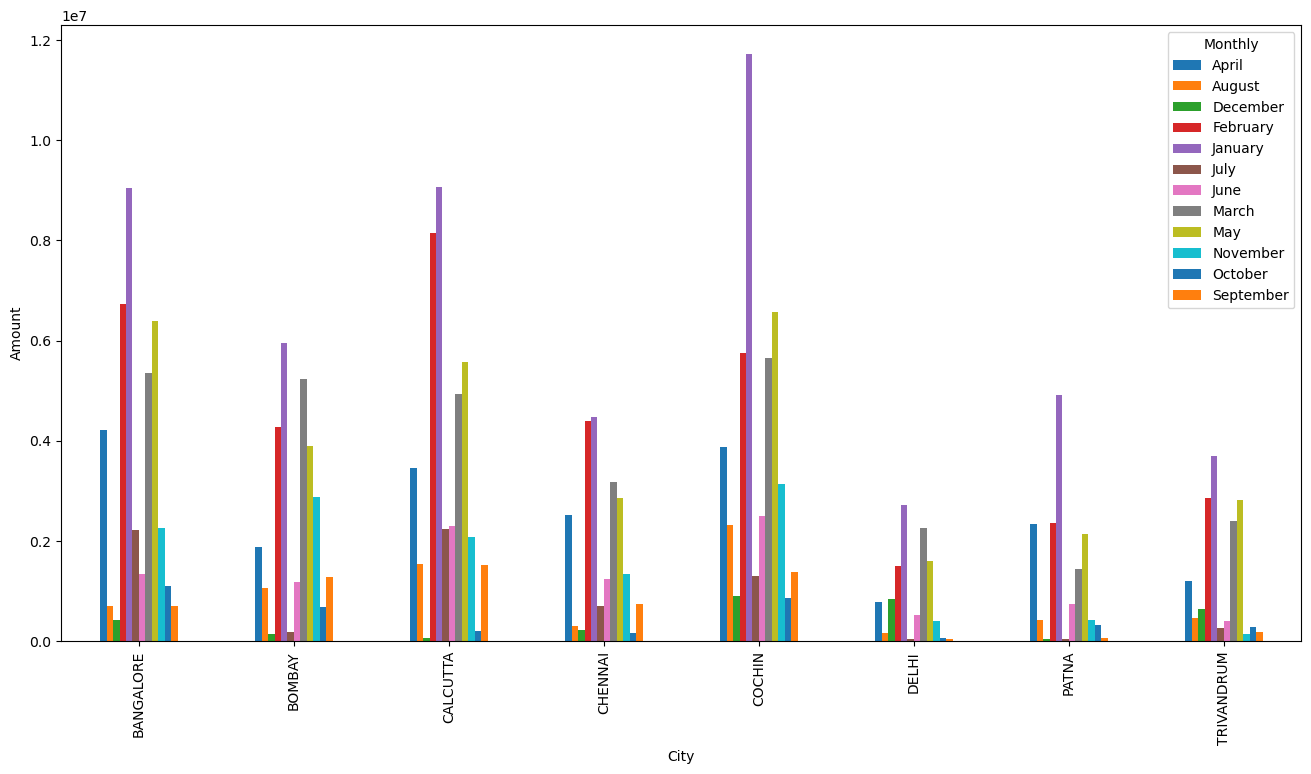

In [123]:
city_wise_spend.plot(kind="bar",figsize=(16,8))
plt.ylabel("Amount")

 b. Comparison of yearly spend on air tickets

Text(0.5, 1.0, 'Comparison of yearly spend on air tickets')

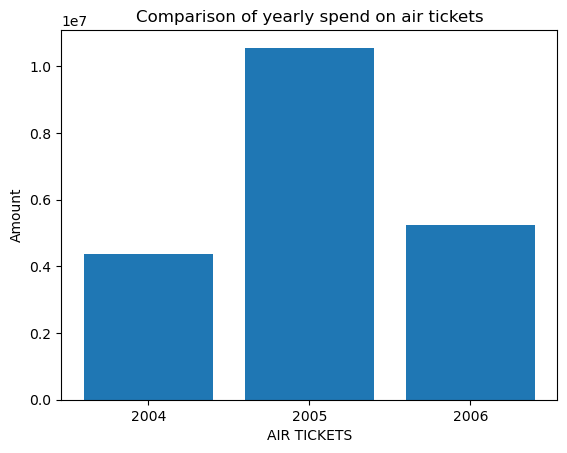

In [148]:
filtered_data=cust_spend[cust_spend["Type"]=="AIR TICKET"]
air_ticket_amt=filtered_data.groupby(["Yearly","Type"])["Amount"].sum().reset_index()

plt.bar(air_ticket_amt["Yearly"],height=air_ticket_amt["Amount"])
plt.xlabel("AIR TICKETS")
plt.ylabel("Amount")
plt.title("Comparison of yearly spend on air tickets")

 c. Comparison of monthly spend for each product (look for any seasonality
 that exists in terms of spend)


In [153]:
prod = cust_spend.pivot_table(index="Product",columns="Monthly",values="Amount",aggfunc="sum")
prod.T

Product,Gold,Platimum,Silver
Monthly,,,
April,13170572.59,5182493.86,1902322.65
August,4954030.42,1714762.80,293109.82
December,2332940.96,750156.19,200537.90
February,24779179.55,9134054.58,2087018.37
January,32413831.83,14951578.51,4206383.62
July,5167416.37,1288156.26,530153.72
June,6538862.64,2965712.71,689537.61
March,19256972.48,7288837.68,3909405.83
May,21548169.76,8151926.49,2140940.01


Text(0.5, 1.0, 'Comparison of monthly spend for each product')

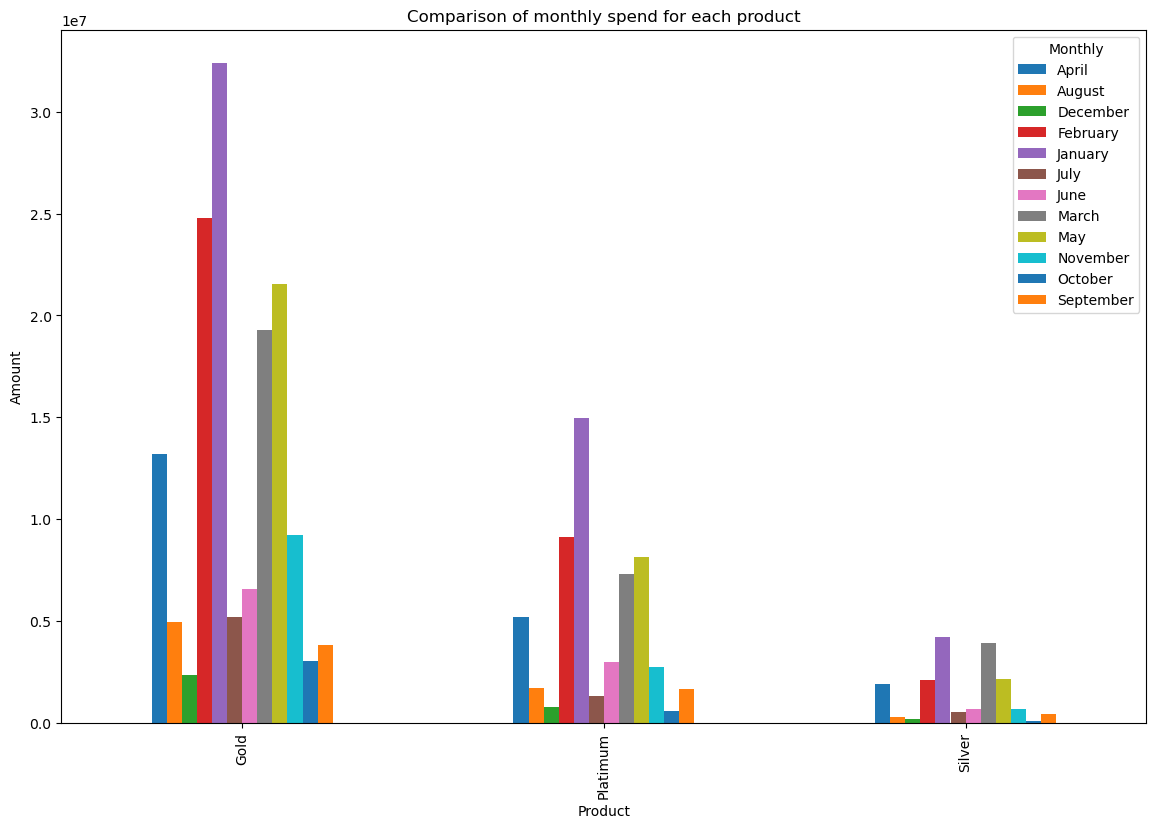

In [157]:
prod.plot(kind="bar",figsize=(14,9))
plt.xlabel("Product")
plt.ylabel("Amount")
plt.title("Comparison of monthly spend for each product")

5. Write user defined PYTHON function to perform the following analysis:
You need to find top 10 customers for each city in terms of their repayment amount by
different products and by different time periods i.e. year or month. The user should be able
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the
function should automatically take these inputs while identifying the top 10 customers.


In [164]:
cust_repayment["Month"]=pd.to_datetime(cust_spend["Month"],format="%d-%b-%y",errors="coerce")
cust_repayment["Monthly"]=cust_repayment["Month"].apply(lambda x:pd.Timestamp.strftime(x,format="%B") if pd.notna(x) else None)
cust_repayment["Yearly"]=cust_repayment["Month"].apply(lambda x:pd.Timestamp.strftime(x,format="%Y") if pd.notna(x) else None)
cust_repayment.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,Unnamed: 4,Monthly,Yearly
0,1,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,NaN,2004-01-12,495414.75,NaN,January,2004
1,1,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,2.00,2004-01-03,245899.02,NaN,January,2004
2,1,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,3.00,2004-01-15,259490.06,NaN,January,2004
3,1,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,4.00,2004-01-25,437555.12,NaN,January,2004
4,1,A1,76.00,BANGALORE,Gold,500000.00,C1,Self Employed,5.00,2005-01-17,165972.88,NaN,January,2005


In [178]:
def summ(Product, timeperiod):
    print("Enter the product and time period")

    # Ensure the input is case-insensitive
    product = Product.lower()
    timeperiod = timeperiod.lower()

    # Define the cities of interest
    cities = ['BANGALORE', 'BOMBAY', 'CALCUTTA', 'CHENNAI', 'COCHIN', 'DELHI', 'PATNA', 'TRIVANDRUM']

    # Create the pivot table
    pivot = cust_repayment.pivot_table(index=['Product', 'City', 'Customer'], columns=timeperiod.capitalize(), values='Amount', aggfunc='sum')

    # Check for conditions
    if product == 'gold' or product == 'platinum' or product == 'silver':
        result = pivot.loc[(product.capitalize(), cities), :]
        return result
    else:
        print("Invalid product or time period entered.")


In [180]:
summ("Silver","monthly")

Enter the product and time period


Monthly                         April    August  December  February   January  \
Product City       Customer                                                     
Silver  BANGALORE  A18            NaN       NaN  50000.00  50000.00 201240.63   
                   A23      180346.51  50000.50  74735.58 100001.00 350003.50   
                   A59       50001.50       NaN       NaN 100003.00 243196.72   
                   A72            NaN       NaN       NaN  50000.00       NaN   
                   A76            NaN       NaN       NaN 265619.05       NaN   
                   A77            NaN       NaN       NaN   3159.62       NaN   
        BOMBAY     A22      353130.91       NaN       NaN 153604.58 391357.70   
                   A75            NaN       NaN       NaN  50001.50       NaN   
                   A80            NaN       NaN       NaN       NaN       NaN   
        CALCUTTA   A2       100000.00       NaN       NaN 150000.00 100000.00   
                   A58      100002.00       NaN  30540.35  98582.88 180038.78   
                   A73            NaN       NaN       NaN  50000.50       NaN   
                   A78            NaN       NaN       NaN       NaN       NaN   
                   A87            NaN       NaN       NaN       NaN       NaN   
        CHENNAI    A85            NaN       NaN       NaN       NaN       NaN   
                   A9       150004.50       NaN       NaN 210247.31 180187.34   
                   A96            NaN       NaN       NaN       NaN  50000.00   
        COCHIN     A100           NaN       NaN       NaN       NaN  69551.19   
                   A25      200006.00       NaN       NaN 151623.74 323777.70   
                   A7        50000.50       NaN       NaN 100001.00 380681.16   
                   A74            NaN       NaN       NaN  50001.00       NaN   
                   A79            NaN       NaN       NaN       NaN       NaN   
        DELHI      A24      209687.68 110525.44       NaN  51371.84 534857.98   
                   A6       153215.28       NaN       NaN 100000.00 277398.18   
        PATNA      A46       94231.79  50000.00  50000.00 177793.48 451755.78   
                   A8        50001.00  50001.00       NaN 100002.00 281807.40   
                   A84            NaN       NaN       NaN       NaN       NaN   
        TRIVANDRUM A57      200002.00  50000.50       NaN 150001.50 177378.57   
                   A68            NaN       NaN       NaN       NaN  50000.00   
                   A86            NaN       NaN       NaN       NaN       NaN   

Monthly                          July      June     March       May  November  \
Product City       Customer                                                     
Silver  BANGALORE  A18       50000.00       NaN 300000.00 100000.00  90352.08   
                   A23      109880.62  50000.50 250002.50 172918.32  50000.50   
                   A59       50001.50 100003.00 150004.50 160586.86       NaN   
                   A72            NaN       NaN       NaN       NaN       NaN   
                   A76            NaN       NaN       NaN       NaN       NaN   
                   A77            NaN       NaN       NaN       NaN       NaN   
        BOMBAY     A22       50000.00 150000.00 292140.92  50000.00 200000.00   
                   A75            NaN       NaN       NaN       NaN       NaN   
                   A80            NaN       NaN 481205.64       NaN       NaN   
        CALCUTTA   A2             NaN       NaN       NaN  50000.00 100000.00   
                   A58            NaN       NaN 102887.23 273564.40  50001.00   
                   A73            NaN       NaN       NaN       NaN       NaN   
                   A78            NaN       NaN  55344.81       NaN       NaN   
                   A87            NaN       NaN  50001.50       NaN       NaN   
        CHENNAI    A85            NaN       NaN  50000.50       NaN       NaN   
                   A9        5